<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Вступление" data-toc-modified-id="Вступление-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Вступление</a></span><ul class="toc-item"><li><span><a href="#Датасет" data-toc-modified-id="Датасет-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Датасет</a></span></li><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Импорт библиотек</a></span></li></ul></li><li><span><a href="#Чтение-датасета" data-toc-modified-id="Чтение-датасета-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Чтение датасета</a></span></li><li><span><a href="#Предварительная-обработка-данных" data-toc-modified-id="Предварительная-обработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предварительная обработка данных</a></span><ul class="toc-item"><li><span><a href="#Преобразование-данных" data-toc-modified-id="Преобразование-данных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Преобразование данных</a></span></li><li><span><a href="#Разделение-на-обучающие-и-тестовые-данные" data-toc-modified-id="Разделение-на-обучающие-и-тестовые-данные-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Разделение на обучающие и тестовые данные</a></span></li><li><span><a href="#Создание-3D-набора-входных-данных" data-toc-modified-id="Создание-3D-набора-входных-данных-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Создание 3D набора входных данных</a></span></li></ul></li><li><span><a href="#Создаём-BiLSTM,-LSTM-и-GRU-модели" data-toc-modified-id="Создаём-BiLSTM,-LSTM-и-GRU-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Создаём BiLSTM, LSTM и GRU модели</a></span><ul class="toc-item"><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Обучение моделей</a></span></li><li><span><a href="#Графики-ошибок-на-обучении-и-тесте" data-toc-modified-id="Графики-ошибок-на-обучении-и-тесте-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Графики ошибок на обучении и тесте</a></span></li><li><span><a href="#Обратное-преобразование-целевой-переменной" data-toc-modified-id="Обратное-преобразование-целевой-переменной-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Обратное преобразование целевой переменной</a></span></li></ul></li><li><span><a href="#Прогнозирование-BiLSTM,-LSTM-и-GRU" data-toc-modified-id="Прогнозирование-BiLSTM,-LSTM-и-GRU-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Прогнозирование BiLSTM, LSTM и GRU</a></span><ul class="toc-item"><li><span><a href="#Графики-истинных-значений-вместе-с-прогнозами" data-toc-modified-id="Графики-истинных-значений-вместе-с-прогнозами-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Графики истинных значений вместе с прогнозами</a></span></li><li><span><a href="#Оценки-RMSE-и-MAE" data-toc-modified-id="Оценки-RMSE-и-MAE-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Оценки RMSE и MAE</a></span></li></ul></li></ul></div>

# Вступление

В этом датасете я сравниваю три наиболее часто используемые рекуррентные нейронные сети: LSTM, GRU и BiLSTM на основе их производительности при прогнозировании потребления нефти НПЗ под воздействием изменения её цены.

## Датасет
Были получены данные о ежедневном потреблении нефти с 01.03.2018 по 31.03.2021. За этот же период собирались данные по её цене.

## Импорт библиотек

In [1]:
import scipy
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional, Activation
import seaborn as sns
from math import sqrt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from sklearn.metrics import mean_squared_error, mean_absolute_error

from plotly.offline import iplot

import cufflinks
cufflinks.go_offline()

cufflinks.set_config_file(world_readable=True, theme='pearl', offline=True)

In [2]:
# настройка воспроизводимости одних и тех же случайных чисел
tf.random.set_seed(8)

# Чтение датасета
Выполняется проверка столбца **date**: имеет ли он правильный формат *DateTime* с помощью **parse_dates = ['date']**.

Столбец **date** устанавливается в качестве индекса датафрейма.

In [3]:
file = 'data_fact_oil_week_3.csv'
raw_data = pd.read_csv(file, parse_dates = ['date'], index_col = 'date')

df = raw_data.copy()

In [4]:
# посмотрим на 5 первых строк
df.head()

,fact,brent_cost
date,,
2018-03-11,208975.494141,456.01
2018-03-18,206654.560547,457.70
2018-03-25,179764.705078,480.30
2018-04-01,193987.857422,484.76
2018-04-08,178785.058594,473.83


In [5]:
# информация о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 160 entries, 2018-03-11 to 2021-03-28
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fact        160 non-null    float64
 1   brent_cost  160 non-null    float64
dtypes: float64(2)
memory usage: 3.8 KB


In [6]:
df['fact'].iplot(kind='hist')

In [7]:
df['brent_cost'].iplot(kind='hist')

# Предварительная обработка данных

Мне нужно сделать новую матрицу признаков, чтобы модель делала прогнозы на основе данных о потреблении нефти за предыдущие 3 недели.

In [8]:
df.drop("brent_cost", axis=1, inplace=True)

Беру кубический корень, т.к. распределение данных ассиметричное.

In [9]:
df['fact']=np.cbrt(df['fact'])

## Преобразование данных
Нормализованные данные повышают производительность нейронных сетей. Здесь я использую **MinMaxScaler** из sklearn.

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))
df_norm = scaler.fit_transform(df)

Здесь создаётся вспомогательная функция *create_dataset* для формирования входных данных.

time_steps = 3. Это означает, что модель делает прогнозы на основе данных за последние 3 недели (в первой итерации цикла for входные данные содержат первые 3 недели, а выходными данными является «fact» на 4-ую неделю).

In [11]:
# преобразование массива в набор данных
def create_dataset(dataset, time_steps = 1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_steps):
        a = dataset[i:i+time_steps, :]
        dataX.append(a)
        dataY.append(dataset[i + time_steps])
    return np.array(dataX), np.array(dataY)

TIME_STEPS = 3

X, y = create_dataset(df_norm, TIME_STEPS)
print('X.shape: ', X.shape)
print('y.shape: ', y.shape)

X.shape:  (157, 3, 1)
y.shape:  (157, 1)


In [12]:
X = scaler.inverse_transform(X[:, :, 0])
y = scaler.inverse_transform(y)

Формирую новую матрицу признаков и возвращаю обратно данные по цене нефти. 

In [13]:
df2 = pd.DataFrame(X)
df2.rename(columns=lambda x: "Week" + str(x + 1), inplace=True)
df2['brent_cost'] = raw_data[3:].brent_cost.values
df2['brent_cost']=np.cbrt(df2['brent_cost'])
df2['target'] = y
df2.index = df[3:].index
df2

,Week1,Week2,Week3,brent_cost,target
date,,,,,
2018-04-01,59.342402,59.121893,56.437549,7.855532,57.888396
2018-04-08,59.121893,56.437549,57.888396,7.796042,56.334841
2018-04-15,56.437549,57.888396,56.334841,7.943720,56.879138
2018-04-22,57.888396,56.334841,56.879138,8.002603,60.339090
2018-04-29,56.334841,56.879138,60.339090,8.023007,60.449953
...,...,...,...,...,...
2021-02-28,54.598018,54.970694,54.633324,7.731952,54.761343
2021-03-07,54.970694,54.633324,54.761343,7.704984,54.812180
2021-03-14,54.633324,54.761343,54.812180,7.828104,54.549353


In [14]:
df2['target'].iplot(kind='hist')

<AxesSubplot:>

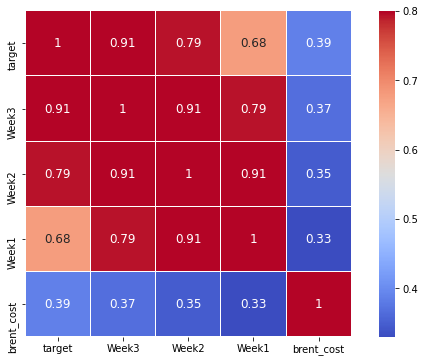

In [15]:
numerical_features = df2.select_dtypes(include=[np.number])
k = 5
correlation = numerical_features.corr(method='spearman')
cols = correlation.nlargest(k, "target")["target"].index
cm = np.corrcoef(df2[cols].values.T)
fig, axes = plt.subplots(figsize = (10, 6))

sns.heatmap(
    cm,
    vmax=.8,
    linewidths=0.01,
    cmap="coolwarm",
    square=True,
    annot=True,
    linecolor="white",
    xticklabels=cols.values,
    annot_kws = {"size": 12},
    yticklabels=cols.values
)

По матрице корреляции видно, что цена на нефть имеет умеренно положительный коэффициент. 

## Разделение на обучающие и тестовые данные
Установим первые 80% данных, как данные для обучения, а оставшиеся 20%, как данные для тестирования модели.

Dimension of train data:  (125, 5)
Dimension of test data:  (32, 5)


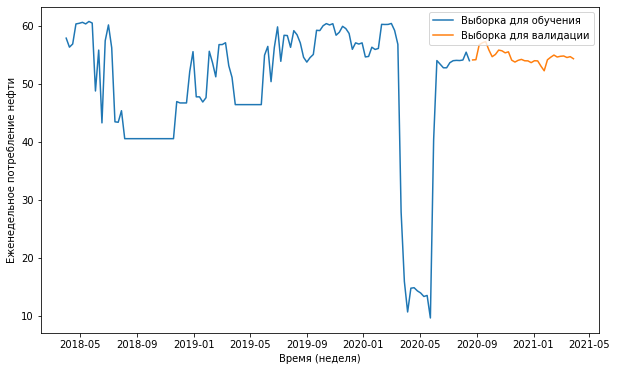

In [16]:
train_size = int(len(df2)*0.8)
train_dataset, test_dataset = df2.iloc[:train_size], df2.iloc[train_size:]

# График обучающей и тестовой выборки
plt.figure(figsize = (10, 6))
plt.plot(train_dataset.target)
plt.plot(test_dataset.target)
plt.xlabel('Время (неделя)')
plt.ylabel('Еженедельное потребление нефти')
plt.legend(['Выборка для обучения', 'Выборка для валидации'], loc='upper right')

print('Dimension of train data: ',train_dataset.shape)
print('Dimension of test data: ', test_dataset.shape)

In [17]:
print('Размерность обучающего массива: ',train_dataset.shape)
print('Размерность тестового массива: ', test_dataset.shape)

Размерность обучающего массива:  (125, 5)
Размерность тестового массива:  (32, 5)


target - целевая переменная (выход) и функция зависимых переменных (вход); Week1, Week2, Week3 и brent_cost.

In [18]:
# Разделяем данные для обучения на X и y
X_train = train_dataset.drop('target', axis = 1)
y_train = train_dataset.loc[:,['target']]

# Разделяем данные для теста на X и y
X_test = test_dataset.drop('target', axis = 1)
y_test = test_dataset.loc[:,['target']]

Я определяю разные скейлеры для ввода и вывода, поскольку они имеют разные размерности. Это особенно важно при использовании функции обратного преобразования.

Необходимо убедиться, что масштаб выходной переменной находится в диапазоне 0-1, чтобы соответствовать масштабу функции активации (tanh) на выходном слое LSTM, GRU и BiLSTM. Кроме того, это лучше для самого обучения, когда входные переменные имеют небольшие значения.

Важно отметить, что нужно масштабировать невидимые данные с помощью скейлера, подстроенного для обучающих данных.

In [19]:
# Преобразуем X_train, y_train, X_test и y_test

# Разный скейлер для входа и выхода 
scaler_x = MinMaxScaler(feature_range = (0,1))
scaler_y = MinMaxScaler(feature_range = (0,1))

# Подстраиваем скелер, используя данные для обучения
input_scaler = scaler_x.fit(X_train)
output_scaler = scaler_y.fit(y_train)

# Применяем скейлер к обучающим данным
train_y_norm = output_scaler.transform(y_train)
train_x_norm = input_scaler.transform(X_train)

# Применяем скейлер к тестовым данным
test_y_norm = output_scaler.transform(y_test)
test_x_norm = input_scaler.transform(X_test)

## Создание 3D набора входных данных
LSTM, GRU и BiLSTM принимают трёхмерный ввод (num_samples, num_timesteps, num_features).

In [20]:
# меняем размерность массивов с 2-х мерной на 3-х мерную
testX = np.repeat(test_x_norm[:, :, np.newaxis], 1, axis=2)
trainX = np.repeat(train_x_norm[:, :, np.newaxis], 1, axis=2)

In [21]:
testY = test_y_norm
trainY = train_y_norm

print('trainX.shape: ', trainX.shape)
print('trainY.shape: ', trainY.shape)
print('testX.shape: ', testX.shape) 
print('testY.shape: ', testY.shape)

trainX.shape:  (125, 4, 1)
trainY.shape:  (125, 1)
testX.shape:  (32, 4, 1)
testY.shape:  (32, 1)


# Создаём BiLSTM, LSTM и GRU модели
Первая функция *create_model_bilstm* создаёт BDLSTM и получает количество нейронов в скрытых слоях. Вторая функция, *create_model*, получает два входа: количество юнитов в скрытых слоях и название модели (LSTM или GRU).

Для простоты BiLSTM, LSTM и GRU имеют 4 скрытых слоя, включая 64 нейрона и 1 нейрон в выходном слое.

Чтобы сделать сети LSTM и GRU устойчивыми к изменениям, используется функция Dropout. Dropout (0.2) случайным образом удаляет 20% юнитов из сети.

In [22]:
# # Создание BiLSTM модели
# def create_model_bilstm(units):
#     model = Sequential()
#     # Первый слой
#     model.add(Bidirectional(LSTM(units = units, return_sequences=True), 
#                             input_shape=(trainX.shape[1], trainX.shape[2])))
#     model.add(Dropout(0.2))
#     # второй слой
#     model.add(Bidirectional(LSTM(units = units, return_sequences=True)))
#     model.add(Dropout(0.2))
#     # третий слой
#     model.add(Bidirectional(LSTM(units = units, return_sequences=True)))
#     model.add(Dropout(0.2))
#     # четвертый слой
#     model.add(Bidirectional(LSTM(units = units)))
#     model.add(Dropout(0.2))
#     model.add(Dense(1))
#     # Компиляция модели
#     model.compile(loss='mse', optimizer='adam')
#     return model

# # Создание LSTM или GRU модели
# def create_model(units, m):
#     model = Sequential()
#     # Первый слой
#     model.add(m (units = units, return_sequences = True, 
#                  input_shape = [trainX.shape[1], trainX.shape[2]]))
#     model.add(Dropout(0.2))
#     # второй слой
#     model.add(m (units = units, return_sequences=True))
#     model.add(Dropout(0.2))
#     # третий слой
#     model.add(m (units = units, return_sequences=True))
#     model.add(Dropout(0.2))
#     # четвертый слой
#     model.add(m (units = units))
#     model.add(Dropout(0.2))
#     model.add(Dense(1))
#     # Компиляция модели
#     model.compile(loss='mse', optimizer='adam')
#     return model

# # BiLSTM
# model_bilstm = create_model_bilstm(64)

# # GRU и LSTM 
# model_gru = create_model(64, GRU)
# model_lstm = create_model(64, LSTM)

In [23]:
# Создание BiLSTM модели
def create_model_bilstm(units):
    model = Sequential()
    # Первый слой
    model.add(Bidirectional(LSTM(units = units, return_sequences=True), 
                            input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(Dropout(0.2))
#     model.add(Activation('sigmoid'))
    # второй слой
    model.add(Bidirectional(LSTM(units = units)))
    model.add(Dropout(0.2))
#     model.add(Activation('sigmoid'))
    model.add(Dense(1))
    # Компиляция модели
    model.compile(loss='mse', optimizer='adam')
    return model

# Создание LSTM или GRU модели
def create_model(units, m):
    model = Sequential()
    # Первый слой
    model.add(m (units = units, return_sequences = True, 
                 input_shape = [trainX.shape[1], trainX.shape[2]]))
    model.add(Dropout(0.2))
#     model.add(Activation('sigmoid'))
    # второй слой
    model.add(m (units = units))
    model.add(Dropout(0.2))
#     model.add(Activation('sigmoid'))
    model.add(Dense(1))
    # Компиляция модели
    model.compile(loss='mse', optimizer='adam')
    return model

# BiLSTM
model_bilstm = create_model_bilstm(64)

# GRU и LSTM 
model_gru = create_model(64, GRU)
model_lstm = create_model(64, LSTM)

## Обучение моделей
Я обучаю модели на 100 эпохах с размером пакета данных равным 32. Важно установить shuffle = False, потому что порядок данных имеет значение.

Чтобы избежать переобучения, я установил раннюю остановку, когда значение "val_loss" перестаёт улучшаться после 10 эпох обучения ("patience" = 10).

In [24]:
# Обучаем BiLSTM, LSTM и GRU
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)

    # shuffle = False, потому что важен порядок данных
    history = model.fit(trainX, trainY, epochs = 100, validation_split = 0.2,
                    batch_size = 32, shuffle = False, callbacks = [early_stop], verbose=0)
    return history

history_bilstm = fit_model(model_bilstm)
history_lstm = fit_model(model_lstm)
history_gru = fit_model(model_gru)

## Графики ошибок на обучении и тесте

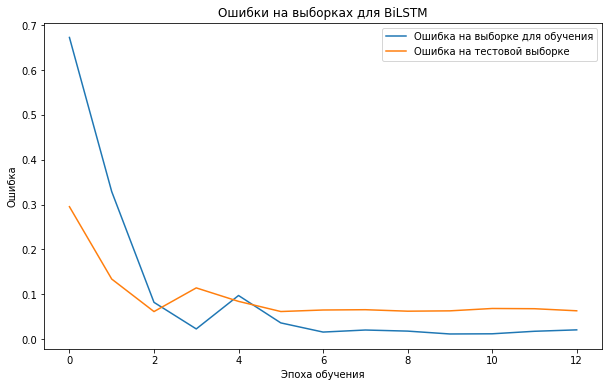

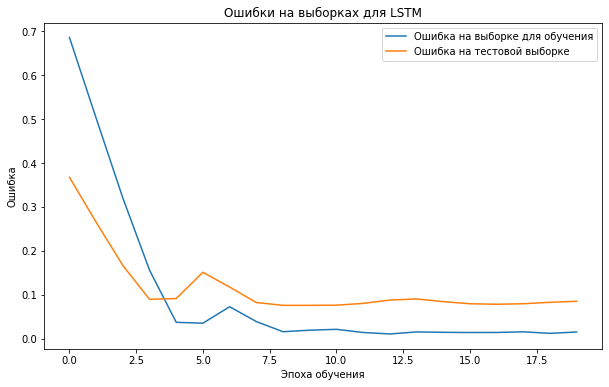

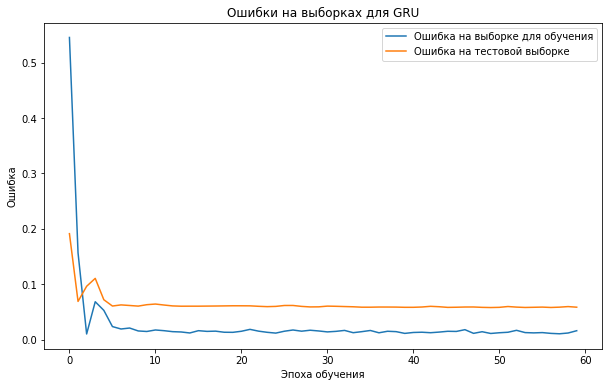

In [25]:
def plot_loss(history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Ошибки на выборках для ' + model_name)
    plt.ylabel('Ошибка')
    plt.xlabel('Эпоха обучения')
    plt.legend(['Ошибка на выборке для обучения', 'Ошибка на тестовой выборке'], loc='upper right')

plot_loss(history_bilstm, 'BiLSTM')
plot_loss(history_lstm, 'LSTM')
plot_loss(history_gru, 'GRU')

## Обратное преобразование целевой переменной
После построения моделей нужно преобразовать целевую переменную в исходный масштаб.

In [26]:
testY = scaler_y.inverse_transform(testY)
trainY = scaler_y.inverse_transform(trainY)
testY = testY**3
trainY = trainY**3

# Прогнозирование BiLSTM, LSTM и GRU
Здесь предсказываются значения по «fact», используя модели BiLSTM, LSTM и GRU. Затем строятся графики истинных значений вместе с прогнозами трех моделей.

In [27]:
def prediction(model):
    prediction = model.predict(testX)
    prediction = scaler_y.inverse_transform(prediction)
    prediction = prediction**3
    return prediction

prediction_bilstm = prediction(model_bilstm)
prediction_lstm = prediction(model_lstm)
prediction_gru = prediction(model_gru)

## Графики истинных значений вместе с прогнозами

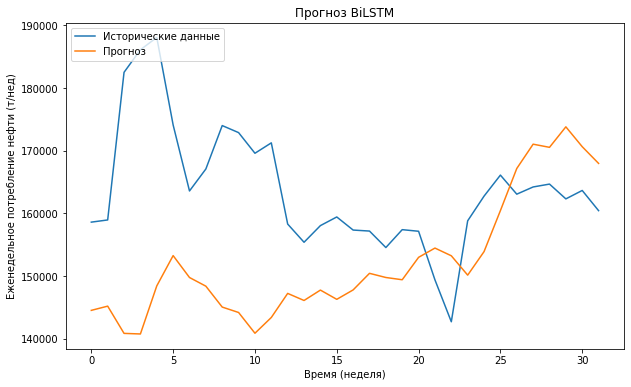

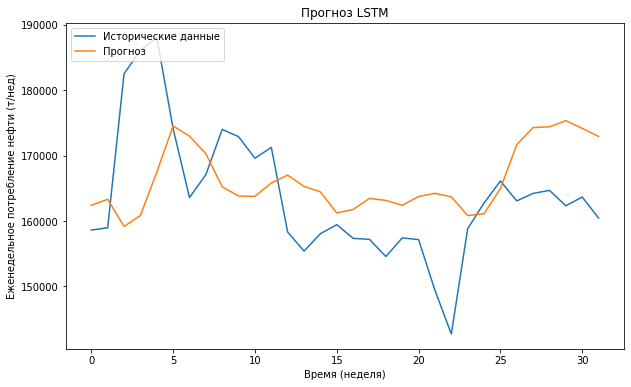

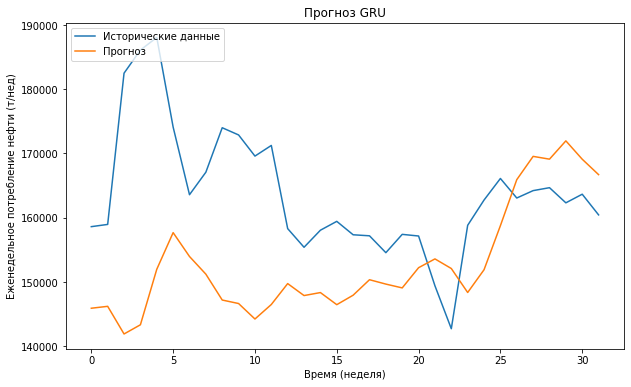

In [28]:
def plot_future(prediction, model_name, testY):
    
    plt.figure(figsize=(10, 6))
    
    range_future = len(prediction)

    plt.plot(np.arange(range_future), np.array(testY), label='Исторические данные')
    plt.plot(np.arange(range_future), np.array(prediction),label='Прогноз')

    plt.title('Прогноз ' + model_name)
    plt.legend(loc='upper left')
    plt.xlabel('Время (неделя)')
    plt.ylabel('Еженедельное потребление нефти (т/нед)')    
    plt.savefig(f'Прогноз для ({model_name})')
    
plot_future(prediction_bilstm, 'BiLSTM', testY)
plot_future(prediction_lstm, 'LSTM', testY)
plot_future(prediction_gru, 'GRU', testY)

## Оценки RMSE и MAE

In [29]:
# Определение функции для расчета MAE и RMSE
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()

    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('')

evaluate_prediction(prediction_bilstm, testY, 'Bidirectional LSTM')
evaluate_prediction(prediction_lstm, testY, 'LSTM')
evaluate_prediction(prediction_gru, testY, 'GRU')

Bidirectional LSTM:
Mean Absolute Error: 15010.5020
Root Mean Square Error: 18840.1842

LSTM:
Mean Absolute Error: 8815.6048
Root Mean Square Error: 10829.5789

GRU:
Mean Absolute Error: 13726.9264
Root Mean Square Error: 17345.4626



Результаты показывают, что **LSTM** имеет лучшую производительность по сравнению с GRU и BiLSTM. Поэтому лучше использовать LSTM для прогнозирования расхода нефти на следующую неделю.